In [67]:
import pandas as pd
import numpy as np
import math
import plotly.plotly as py
import plotly.graph_objs as go
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics as m
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit
import gc
import datetime
import os
import time
from mpl_toolkits.basemap import Basemap
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


https://archive.ics.uci.edu/ml/datasets/bank+marketing

In [68]:
bank = pd.read_csv('bank2.csv')
banknames = pd.read_csv('bank2.csv')

# Input variables:
 
   ## bank client data:
   1.age (numeric)
   
   2.job : type of job (categorical: 'admin.','unknown','unemployed','management','housemaid','entrepreneur','student',
                                       'blue-collar','self-employed','retired','technician','services') 
                                       
   3.marital : marital status (categorical: 'married','divorced','single'; note: 'divorced' means divorced or widowed)
   
   4.education (categorical: 'unknown','secondary','primary','tertiary')
   
   5.default: has credit in default? (binary: 'yes','no')
   
   6.balance: average yearly balance, in euros (numeric) 
   
   7.housing: has housing loan? (binary: 'yes','no')
   
   8.loan: has personal loan? (binary: 'yes','no')
   ## related with the last contact of the current campaign:
   9.contact: contact communication type (categorical: 'unknown','telephone','cellular') 
   
  10.day: last contact day of the month (numeric)
  
  11.month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
  
  12.duration: last contact duration, in seconds (numeric)
   ## other attributes:
  13.campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  14.pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15.previous: number of contacts performed before this campaign and for this client (numeric)
  
  16.poutcome: outcome of the previous marketing campaign (categorical: 'unknown','other','failure','success')

  Output variable (desired target):
  
  17.deposit - has the client subscribed a term deposit? (binary: 'yes','no')

In [69]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [70]:
len(bank)

11162

In [71]:
bank = bank[['job','marital','education','default','housing','loan','contact','poutcome','deposit','age','balance','day','month','duration','campaign','pdays','previous']]

In [72]:
bank.head()

,job,marital,education,default,housing,loan,contact,poutcome,deposit,age,balance,day,month,duration,campaign,pdays,previous
0,admin.,married,secondary,no,yes,no,unknown,unknown,yes,59,2343,5,may,1042,1,-1,0
1,admin.,married,secondary,no,no,no,unknown,unknown,yes,56,45,5,may,1467,1,-1,0
2,technician,married,secondary,no,yes,no,unknown,unknown,yes,41,1270,5,may,1389,1,-1,0
3,services,married,secondary,no,yes,no,unknown,unknown,yes,55,2476,5,may,579,1,-1,0
4,admin.,married,tertiary,no,no,no,unknown,unknown,yes,54,184,5,may,673,2,-1,0


In [73]:
bank.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)

In [74]:
changeable = bank.iloc[:,0:9]

In [75]:
changeable.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome', 'deposit'],
      dtype='object')

In [76]:
labelencoder=LabelEncoder()
for x in bank.columns:
    if x in changeable.columns:
        bank[x]=labelencoder.fit_transform(bank[x])

In [77]:
bank.head()

,job,marital,education,default,housing,loan,contact,poutcome,deposit,age,balance,day,month,duration,campaign,pdays,previous
0,0,1,1,0,1,0,2,3,1,59,2343,5,5,1042,1,-1,0
1,0,1,1,0,0,0,2,3,1,56,45,5,5,1467,1,-1,0
2,9,1,1,0,1,0,2,3,1,41,1270,5,5,1389,1,-1,0
3,7,1,1,0,1,0,2,3,1,55,2476,5,5,579,1,-1,0
4,0,1,2,0,0,0,2,3,1,54,184,5,5,673,2,-1,0


In [78]:
bank.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome', 'deposit', 'age', 'balance', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous'],
      dtype='object')

In [79]:
bank.describe()

,job,marital,education,default,housing,loan,contact,poutcome,deposit,age,balance,day,month,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,4.487905,1.199337,1.285164,0.015051,0.473123,0.130801,0.489697,2.477782,0.473840,41.231948,1528.538524,15.658036,6.190826,371.993818,2.508421,51.330407,0.832557
std,3.225132,0.625552,0.749478,0.121761,0.499299,0.337198,0.818724,1.002952,0.499338,11.913369,3225.413326,8.420740,2.572792,347.128386,2.722077,108.758282,2.292007
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,-6847.000000,1.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,32.000000,122.000000,8.000000,5.000000,138.000000,1.000000,-1.000000,0.000000
50%,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,39.000000,550.000000,15.000000,6.000000,255.000000,2.000000,-1.000000,0.000000
75%,7.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,3.000000,1.000000,49.000000,1708.000000,22.000000,8.000000,496.000000,3.000000,20.750000,1.000000
max,11.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,95.000000,81204.000000,31.000000,12.000000,3881.000000,63.000000,854.000000,58.000000


In [80]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
job          11162 non-null int64
marital      11162 non-null int64
education    11162 non-null int64
default      11162 non-null int64
housing      11162 non-null int64
loan         11162 non-null int64
contact      11162 non-null int64
poutcome     11162 non-null int64
deposit      11162 non-null int64
age          11162 non-null int64
balance      11162 non-null int64
day          11162 non-null int64
month        11162 non-null int64
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
dtypes: int64(17)
memory usage: 1.4 MB


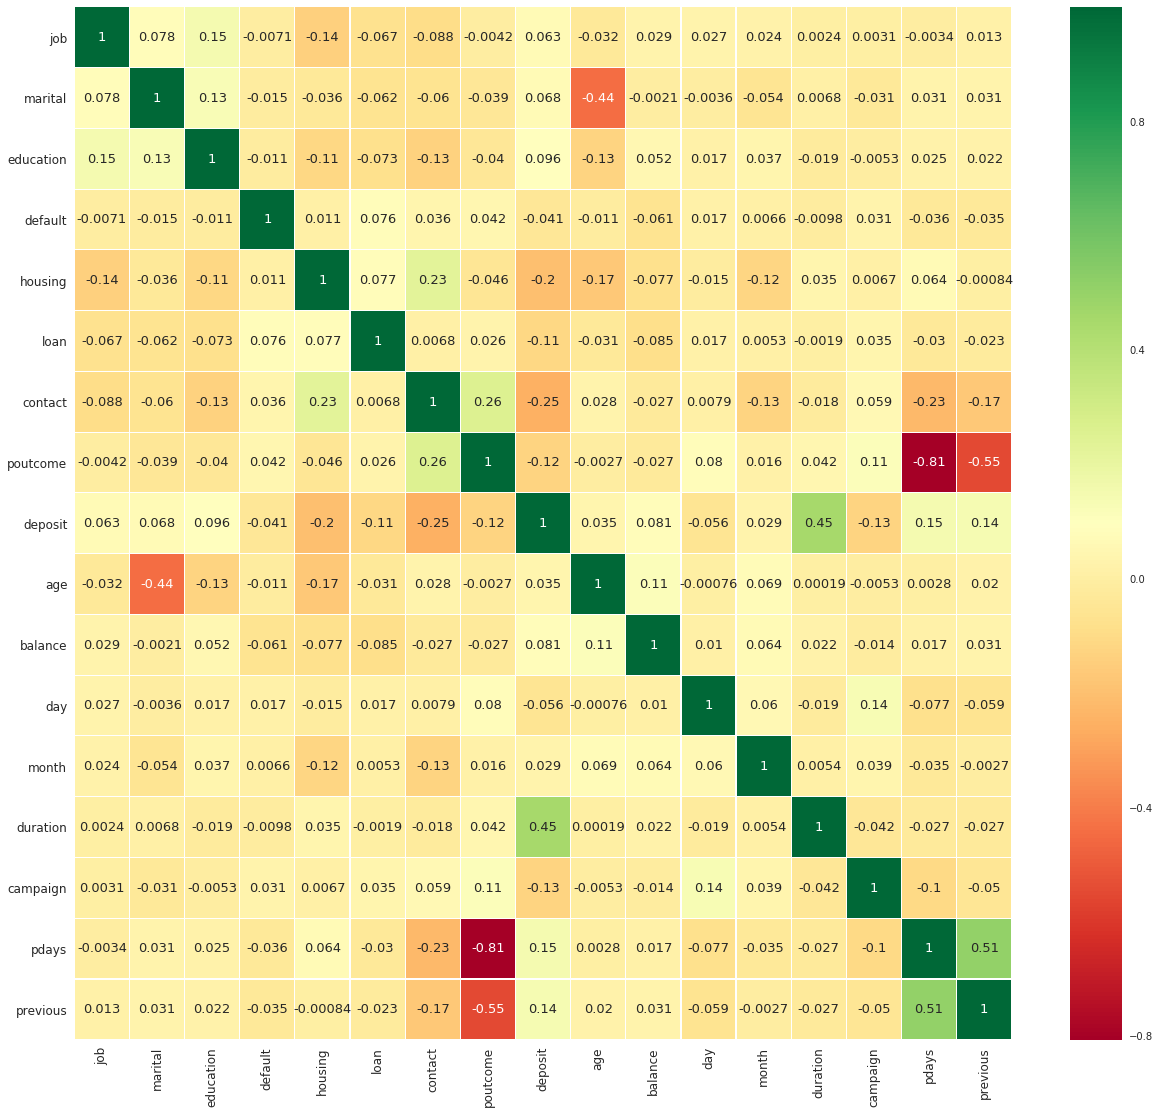

In [81]:
corr = bank.corr()

sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':13})
fig=plt.gcf()
fig.set_size_inches(21,19)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [82]:
bank.corr()

,job,marital,education,default,housing,loan,contact,poutcome,deposit,age,balance,day,month,duration,campaign,pdays,previous
job,1.000000,0.078314,0.147046,-0.007066,-0.136965,-0.067092,-0.087915,-0.004238,0.063395,-0.031603,0.028736,0.026589,0.023850,0.002432,0.003104,-0.003385,0.012665
marital,0.078314,1.000000,0.125845,-0.014691,-0.036345,-0.062029,-0.060456,-0.039424,0.067610,-0.442782,-0.002138,-0.003642,-0.053978,0.006781,-0.030794,0.031200,0.031281
education,0.147046,0.125845,1.000000,-0.010709,-0.109168,-0.073154,-0.132540,-0.040262,0.095948,-0.126018,0.051728,0.016759,0.036550,-0.019122,-0.005327,0.025165,0.022427
default,-0.007066,-0.014691,-0.010709,1.000000,0.011076,0.076434,0.035709,0.042357,-0.040680,-0.011425,-0.060954,0.017342,0.006561,-0.009760,0.030975,-0.036282,-0.035273
housing,-0.136965,-0.036345,-0.109168,0.011076,1.000000,0.076761,0.226392,-0.046370,-0.203888,-0.168700,-0.077092,-0.014770,-0.117996,0.035051,0.006660,0.064497,-0.000840
loan,-0.067092,-0.062029,-0.073154,0.076434,0.076761,1.000000,0.006829,0.026344,-0.110580,-0.031418,-0.084589,0.017269,0.005308,-0.001914,0.034722,-0.030416,-0.022668
contact,-0.087915,-0.060456,-0.132540,0.035709,0.226392,0.006829,1.000000,0.257993,-0.249847,0.027762,-0.027295,0.007943,-0.127822,-0.018000,0.059258,-0.227785,-0.169919
poutcome,-0.004238,-0.039424,-0.040262,0.042357,-0.046370,0.026344,0.257993,1.000000,-0.122369,-0.002699,-0.027151,0.080221,0.016088,0.042171,0.112127,-0.806533,-0.549333
deposit,0.063395,0.067610,0.095948,-0.040680,-0.203888,-0.110580,-0.249847,-0.122369,1.000000,0.034901,0.081129,-0.056326,0.028645,0.451919,-0.128081,0.151593,0.139867
age,-0.031603,-0.442782,-0.126018,-0.011425,-0.168700,-0.031418,0.027762,-0.002699,0.034901,1.000000,0.112300,-0.000762,0.069312,0.000189,-0.005278,0.002774,0.020169


# Histograms of the variables

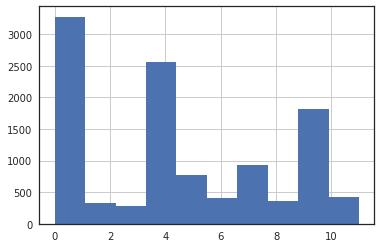

In [83]:
bank['job'].hist()

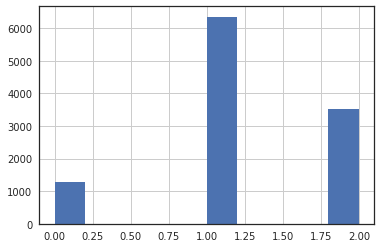

In [84]:
bank['marital'].hist()

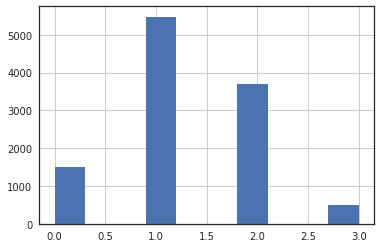

In [85]:
bank['education'].hist()

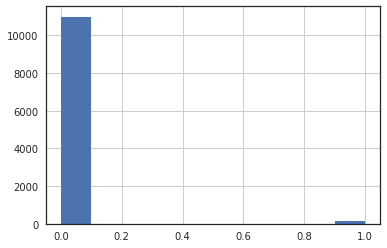

In [86]:
bank['default'].hist()

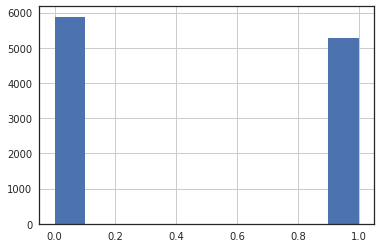

In [87]:
bank['housing'].hist()

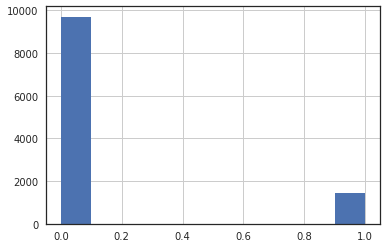

In [88]:
bank['loan'].hist()

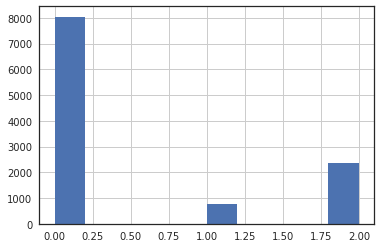

In [89]:
bank['contact'].hist()

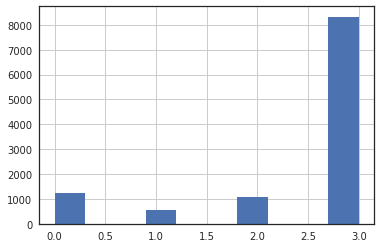

In [90]:
bank['poutcome'].hist()

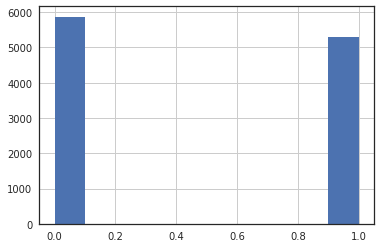

In [91]:
bank['deposit'].hist()

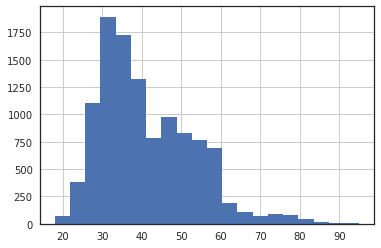

In [92]:
bank['age'].hist(bins=20)

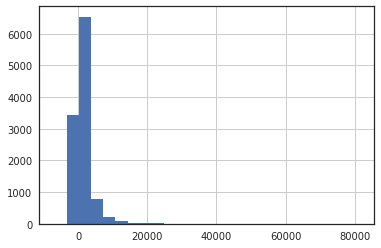

In [93]:
bank['balance'].hist(bins=25)

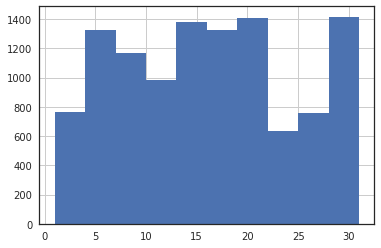

In [94]:
bank['day'].hist()

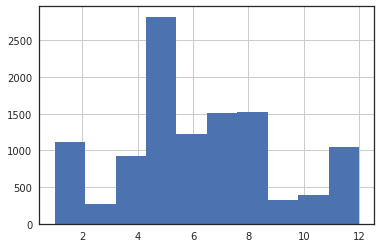

In [95]:
bank['month'].hist()

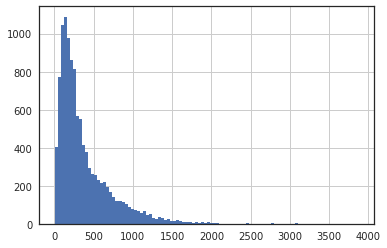

In [96]:
bank['duration'].hist(bins=100)

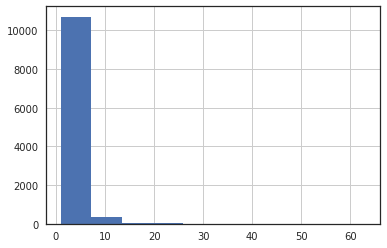

In [97]:
bank['campaign'].hist()

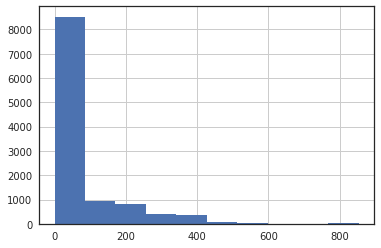

In [98]:
bank['pdays'].hist()

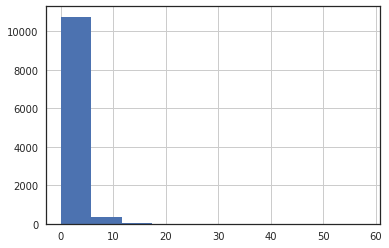

In [99]:
bank['previous'].hist()

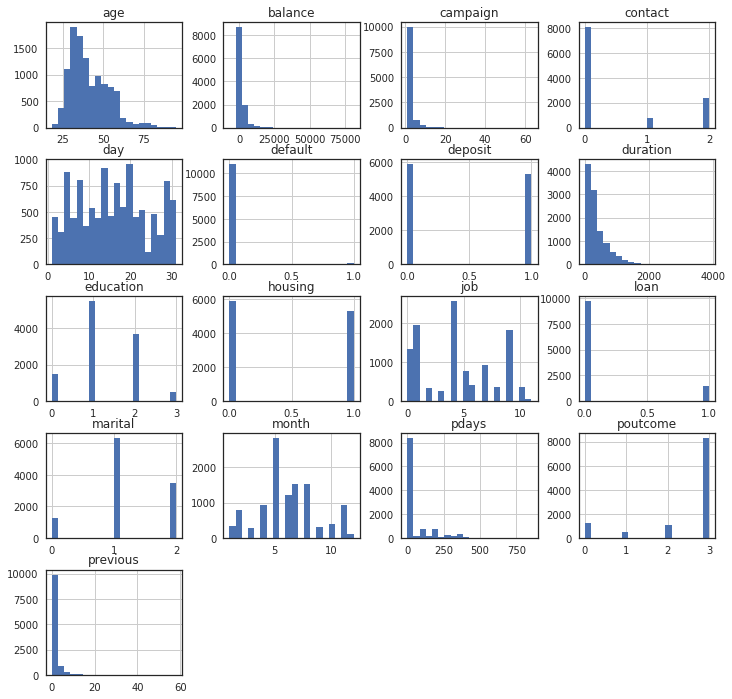

In [100]:
bank.hist(bins=20,figsize=(12,12))
plt.show()

In [101]:
banknames['month'].value_counts()

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64

# Lets see the percentage breakdown of client term deposit subscription

In [102]:
ct_month = pd.crosstab(bank['month'], bank['deposit']).apply(lambda x: x/x.sum() * 100)
ct_month

deposit,0,1
month,,
1,3.439469,2.684818
2,5.704069,8.338060
3,0.476758,4.688977
4,5.891367,10.909435
5,32.334412,17.489128
6,11.510301,10.323313
7,15.103014,11.854793
8,14.149498,13.008130
9,0.851354,5.086028


# Looks like the month of May was the most popular time for bank marketing with 17.49% of total term deposits coming from that month. But May also has a very poor success ratio since May also has the highest decline percentage at 32.33%

Text(0.5,1,'Marketing Activity by Month')

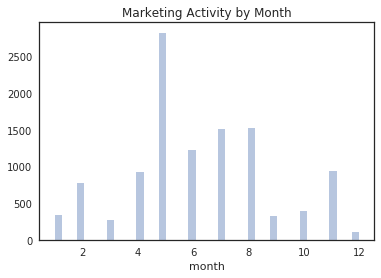

In [103]:
sns.distplot(bank['month'],kde=False).set_title('Marketing Activity by Month')


In [104]:
bank.head()

,job,marital,education,default,housing,loan,contact,poutcome,deposit,age,balance,day,month,duration,campaign,pdays,previous
0,0,1,1,0,1,0,2,3,1,59,2343,5,5,1042,1,-1,0
1,0,1,1,0,0,0,2,3,1,56,45,5,5,1467,1,-1,0
2,9,1,1,0,1,0,2,3,1,41,1270,5,5,1389,1,-1,0
3,7,1,1,0,1,0,2,3,1,55,2476,5,5,579,1,-1,0
4,0,1,2,0,0,0,2,3,1,54,184,5,5,673,2,-1,0


# Next lets change the duration variable into minutes

In [105]:
bank['duration'] = bank['duration'] / 60
bank['duration'] = bank['duration'].apply(lambda x: round(x, 2))
bank.head()

,job,marital,education,default,housing,loan,contact,poutcome,deposit,age,balance,day,month,duration,campaign,pdays,previous
0,0,1,1,0,1,0,2,3,1,59,2343,5,5,17.37,1,-1,0
1,0,1,1,0,0,0,2,3,1,56,45,5,5,24.45,1,-1,0
2,9,1,1,0,1,0,2,3,1,41,1270,5,5,23.15,1,-1,0
3,7,1,1,0,1,0,2,3,1,55,2476,5,5,9.65,1,-1,0
4,0,1,2,0,0,0,2,3,1,54,184,5,5,11.22,2,-1,0


In [106]:
bank['deposit'].value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

In [107]:
bank['deposit'].value_counts()/len(bank)

0    0.52616
1    0.47384
Name: deposit, dtype: float64

In [108]:
total = len(bank)
no = len(bank[bank['deposit'] == 0])
yes = len(bank[bank['deposit'] == 1])
print('Accepted:',round(no/total*100,2),'%','\n''Declined:',round(yes/total*100,2),'%')

Accepted: 52.62 % 
Declined: 47.38 %


In [109]:
months_example = pd.crosstab(index=bank['deposit'],
                            columns=bank['month'],
                            margins=True)
(months_example/months_example.loc['All']) * 100

month,1,2,3,4,5,6,7,8,9,10,11,12,All
deposit,,,,,,,,,,,,,
0,58.72093,43.170103,10.144928,37.486457,67.245042,55.319149,58.586526,54.707044,15.673981,17.602041,57.264051,9.090909,52.616019
1,41.27907,56.829897,89.855072,62.513543,32.754958,44.680851,41.413474,45.292956,84.326019,82.397959,42.735949,90.909091,47.383981
All,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [110]:
months_example

month,1,2,3,4,5,6,7,8,9,10,11,12,All
deposit,,,,,,,,,,,,,
0,202,335,28,346,1899,676,887,831,50,69,540,10,5873
1,142,441,248,577,925,546,627,688,269,323,403,100,5289
All,344,776,276,923,2824,1222,1514,1519,319,392,943,110,11162


In [111]:
months_example = pd.crosstab(index=bank['deposit'],
                            columns=bank['month'],
                            margins=True)

# Gives the percent of suscribed term deposits
(months_example/months_example.loc['All']) * 100



month,1,2,3,4,5,6,7,8,9,10,11,12,All
deposit,,,,,,,,,,,,,
0,58.72093,43.170103,10.144928,37.486457,67.245042,55.319149,58.586526,54.707044,15.673981,17.602041,57.264051,9.090909,52.616019
1,41.27907,56.829897,89.855072,62.513543,32.754958,44.680851,41.413474,45.292956,84.326019,82.397959,42.735949,90.909091,47.383981
All,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


Text(0.5,1,'Frequency of Distribution of Deposits by Month')

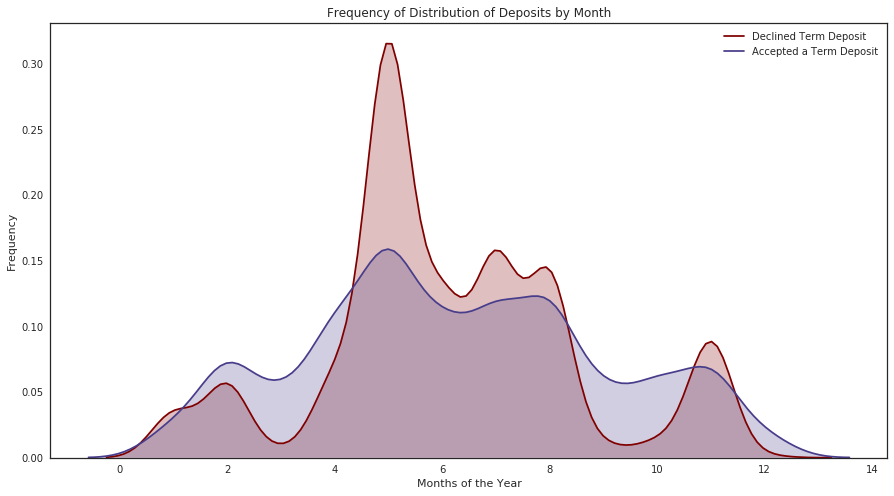

In [112]:
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(bank.loc[(bank['deposit'] == 0),'month'] , color='#800000',shade=True,label='Declined Term Deposit')
ax=sns.kdeplot(bank.loc[(bank['deposit'] == 1),'month'] , color='#483D8B',shade=True, label='Accepted a Term Deposit')
ax.set(xlabel='Months of the Year', ylabel='Frequency')
plt.title('Frequency of Distribution of Deposits by Month')

In [113]:
cross_months = pd.crosstab(bank['deposit'], bank['month'])
print(cross_months)
nodeposit_rate = pd.DataFrame(cross_months.iloc[0])
deposit_rate = pd.DataFrame(cross_months.iloc[1])
nodeposit_rate = nodeposit_rate.values.tolist()
deposit_rate = deposit_rate.values.tolist()
print(deposit_rate[0])

month     1    2    3    4     5    6    7    8    9    10   11   12
deposit                                                             
0        202  335   28  346  1899  676  887  831   50   69  540   10
1        142  441  248  577   925  546  627  688  269  323  403  100
[142]


# Lets break down the months into seasons and look for a pattern there

In [114]:
bank['season'] = np.nan
lst=[bank]
for column in lst:
    column.loc[(column['month'] >= 3) & (column['month'] <= 5), 'season'] = 'spring'
    column.loc[(column['month'] >= 6) & (column['month'] <= 8), 'season'] = 'summer'
    column.loc[(column['month'] >= 9) & (column['month'] <= 11), 'season'] = 'fall'
    column.loc[column['month'] <= 2, 'season'] = 'winter'
    column.loc[column['month'] == 12, 'season'] = 'winter'
    
bank['season'].value_counts()

summer    4255
spring    4023
fall      1654
winter    1230
Name: season, dtype: int64

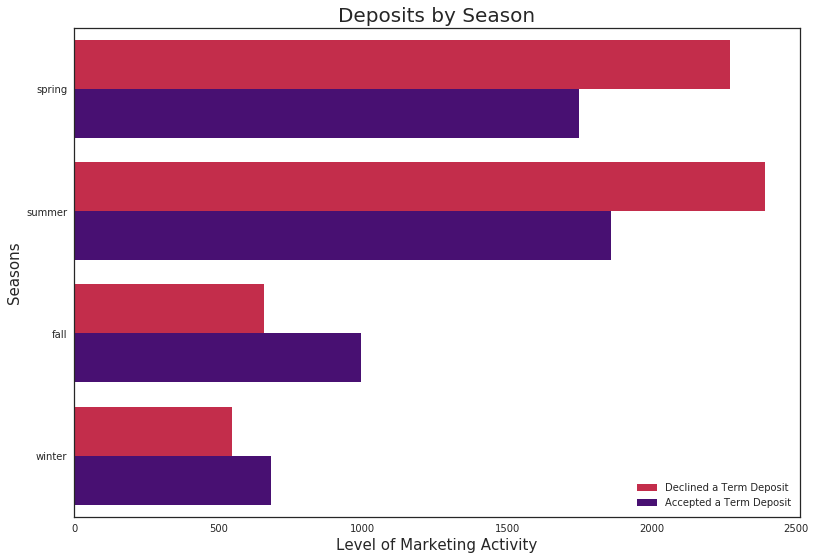

In [115]:
fig = plt.figure(figsize=(13,9),)

colors = ['#DC143C', '#4B0082']
ax = sns.countplot(y='season', data=bank,hue='deposit',palette = colors) 

plt.title("Deposits by Season", fontsize=20)
plt.ylabel("Seasons", fontsize=15)
plt.xlabel("Level of Marketing Activity", fontsize=15)
legend_name = plt.legend()
legend_name.get_texts()[0].set_text('Declined a Term Deposit')
legend_name.get_texts()[1].set_text('Accepted a Term Deposit')

plt.show()

# Looking now at the affect of age on term deposits

Text(0.5,1,'Frequency of Distribution of Deposits by Age')

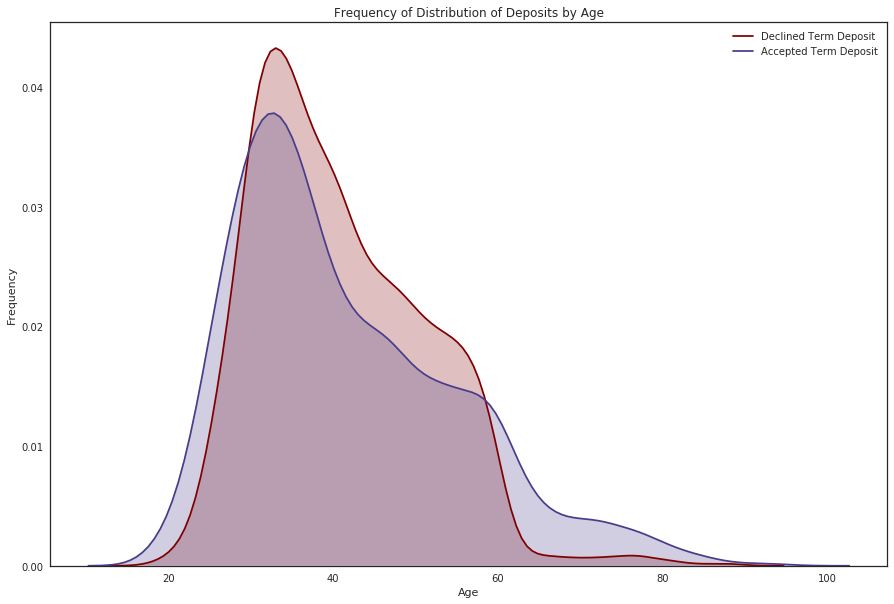

In [116]:
fig = plt.figure(figsize=(15,10),)
ax=sns.kdeplot(bank.loc[(bank['deposit'] == 0),'age'] , color='#800000',shade=True,label='Declined Term Deposit')
ax=sns.kdeplot(bank.loc[(bank['deposit'] == 1),'age'] , color='#483D8B',shade=True, label='Accepted Term Deposit')
ax.set(xlabel='Age', ylabel='Frequency')
plt.title('Frequency of Distribution of Deposits by Age')

# Like months and seasons, lets break ages down into decade groups

In [117]:
lst = [bank]
for column in lst:
    column.loc[column['age'] < 30,  'age_category'] = 20
    column.loc[(column['age'] >= 30) & (column['age'] <= 39), 'age_category'] = 30
    column.loc[(column['age'] >= 40) & (column['age'] <= 49), 'age_category'] = 40
    column.loc[(column['age'] >= 50) & (column['age'] <= 59), 'age_category'] = 50
    column.loc[column['age'] >= 60, 'age_category'] = 60
 
bank['age_category'] = bank['age_category'].astype(np.int64)


In [118]:
bank['age_category'].value_counts()

30    4318
40    2628
50    1885
20    1551
60     780
Name: age_category, dtype: int64

In [119]:
cross_age_category = pd.crosstab(bank['deposit'], bank['age_category']).apply(lambda x: x/x.sum() * 100)
cross_age_category

age_category,20,30,40,50,60
deposit,,,,,
0,40.167634,55.697082,59.550989,58.355438,23.076923
1,59.832366,44.302918,40.449011,41.644562,76.923077


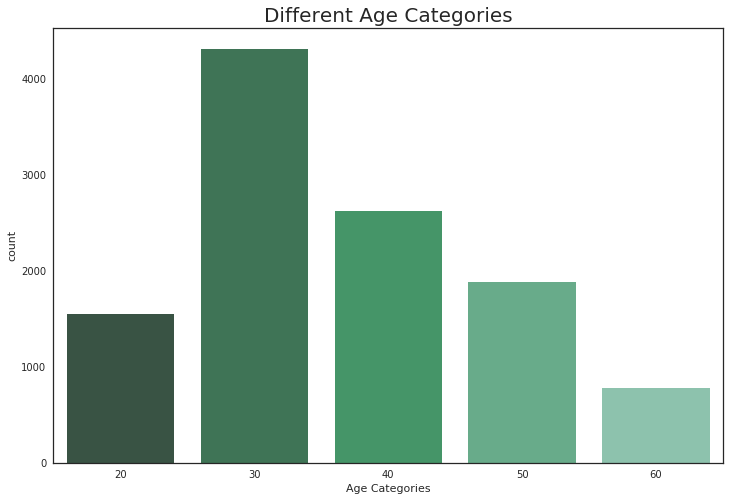

In [120]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(x='age_category', data=bank, palette='BuGn_d')
ax.set_title('Different Age Categories', fontsize=20)
ax.set_xlabel('Age Categories')
plt.show()

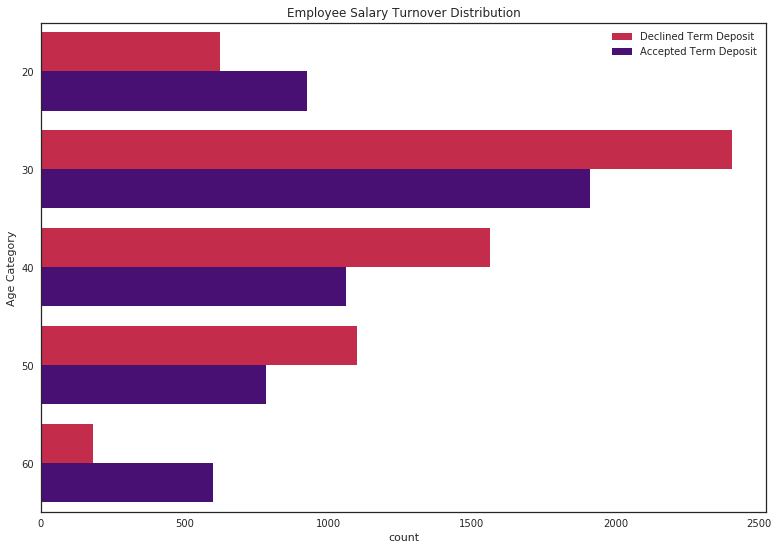

In [121]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(13, 9))
labels = ['No Deposit', 'Deposit']
sns.countplot(y='age_category', hue='deposit', data=bank, palette=colors).set_title('Employee Salary Turnover Distribution')
ax.set_ylabel('Age Category')
legend_name = plt.legend()
legend_name.get_texts()[0].set_text('Declined Term Deposit')
legend_name.get_texts()[1].set_text('Accepted Term Deposit')

# Now lets delve into the different occupations of people in the dataset

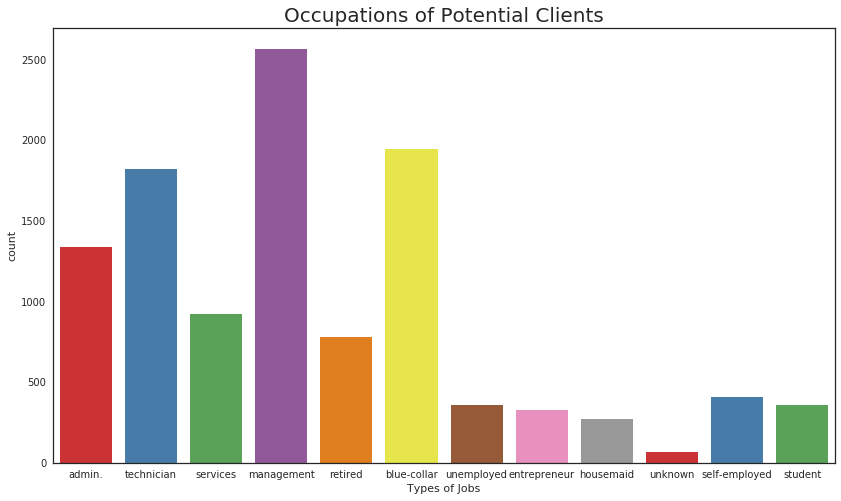

In [122]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(14,8))
sns.countplot(x='job', data=banknames, palette='Set1')
ax.set_title('Occupations of Potential Clients', fontsize=20)
ax.set_xlabel('Types of Jobs')
plt.show()

# Label encoding is useful for classification but not so much for exploration.

In [123]:
cross_job_category = pd.crosstab(bank['deposit'], bank['job']).apply(lambda x: x/x.sum() * 100)
print(cross_job_category)


job             0          1     2          3          4          5   \
deposit                                                                
0        52.698651  63.580247  62.5  60.218978  49.298519  33.676093   
1        47.301349  36.419753  37.5  39.781022  50.701481  66.323907   

job            6          7          8          9          10         11  
deposit                                                                   
0        53.82716  60.021668  25.277778  53.922106  43.417367  51.428571  
1        46.17284  39.978332  74.722222  46.077894  56.582633  48.571429  


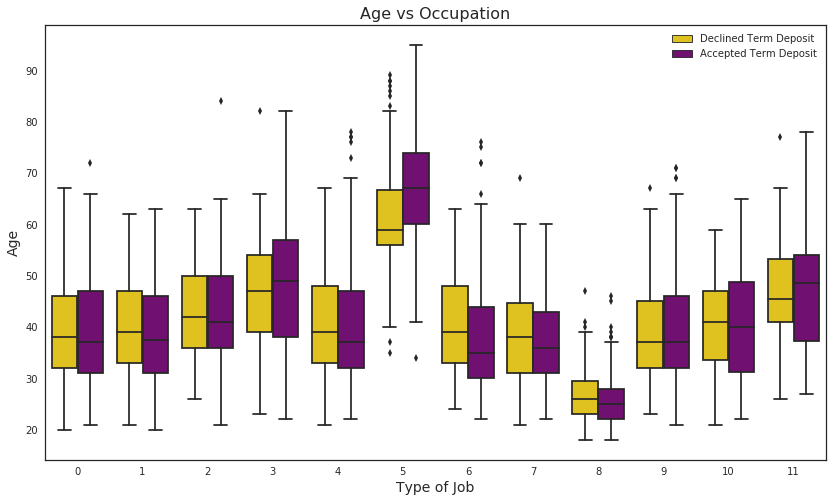

In [124]:
x = plt.figure(figsize=(14,8))
ax = sns.boxplot(x="job", y="age", hue="deposit",
                  data=bank, palette={0:'#FFD700', 1:'#800080'})
plt.title("Age vs Occupation", fontsize=16)
plt.xlabel(s="Type of Job", fontsize=14)
plt.ylabel(s="Age", fontsize=14)
legend_name = plt.legend()
legend_name.get_texts()[0].set_text('Declined Term Deposit')
legend_name.get_texts()[1].set_text('Accepted Term Deposit')

plt.show()

# Now lets do some classification 

In [125]:
bank.head()

,job,marital,education,default,housing,loan,contact,poutcome,deposit,age,balance,day,month,duration,campaign,pdays,previous,season,age_category
0,0,1,1,0,1,0,2,3,1,59,2343,5,5,17.37,1,-1,0,spring,50
1,0,1,1,0,0,0,2,3,1,56,45,5,5,24.45,1,-1,0,spring,50
2,9,1,1,0,1,0,2,3,1,41,1270,5,5,23.15,1,-1,0,spring,40
3,7,1,1,0,1,0,2,3,1,55,2476,5,5,9.65,1,-1,0,spring,50
4,0,1,2,0,0,0,2,3,1,54,184,5,5,11.22,2,-1,0,spring,50


# First we need to rearrange our data for easier variable assignment and the final classification. So lets read in the data once more and do some manual value reassignment. Label encoder tends to not play nice with classifiers later on.  

In [126]:
data = pd.read_csv('bank2.csv',sep=',',header='infer')
data = data.drop(['day','poutcome'],axis=1)

def binarytype_(data):
    
    data.deposit.replace(('yes', 'no'), (1, 0), inplace=True)
    data.default.replace(('yes','no'),(1,0),inplace=True)
    data.housing.replace(('yes','no'),(1,0),inplace=True)
    data.loan.replace(('yes','no'),(1,0),inplace=True)
    data.contact.replace(('telephone','cellular','unknown'),(1,2,3),inplace=True)
    data.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)
    
    return data

data = binarytype_(data)


In [127]:
def age_(data):
    
    data['Adult'] = 0
    data['Middle_Aged'] = 0
    data['old'] = 0    
    data.loc[(data['age'] <= 35) & (data['age'] >= 18),'Adult'] = 1
    data.loc[(data['age'] <= 60) & (data['age'] >= 36),'Middle_Aged'] = 1
    data.loc[data['age'] >=61,'old'] = 1
    
    return data

def campaign_(data):
    
    
    data.loc[data['campaign'] == 1,'campaign'] = 1
    data.loc[(data['campaign'] >= 2) & (data['campaign'] <= 3),'campaign'] = 2
    data.loc[data['campaign'] >= 4,'campaign'] = 3
    
    return data

def duration_(data):
    
    data['t_min'] = 0
    data['t_e_min'] = 0
    data['e_min']=0
    data.loc[data['duration'] <= 5,'t_min'] = 1
    data.loc[(data['duration'] > 5) & (data['duration'] <= 10),'t_e_min'] = 1
    data.loc[data['duration'] > 10,'e_min'] = 1
    
    return data

def pdays_(data):
    data['pdays_not_contacted'] = 0
    data['months_passed'] = 0
    data.loc[data['pdays'] == -1 ,'pdays_not_contacted'] = 1
    data['months_passed'] = data['pdays']/30
    data.loc[(data['months_passed'] >= 0) & (data['months_passed'] <=2) ,'months_passed'] = 1
    data.loc[(data['months_passed'] > 2) & (data['months_passed'] <=6),'months_passed'] = 2
    data.loc[data['months_passed'] > 6 ,'months_passed'] = 3
    
    return data

def previous_(data):
    
    data['Not_Contacted'] = 0
    data['Contacted'] = 0
    data.loc[data['previous'] == 0 ,'Not_Contacted'] = 1
    data.loc[(data['previous'] >= 1) & (data['pdays'] <=99) ,'Contacted'] = 1
    data.loc[data['previous'] >= 100,'Contacted'] = 2
    
    return data

def balance_(data):
    data['Neg_Balance'] = 0
    data['No_Balance'] = 0
    data['Pos_Balance'] = 0
    
    data.loc[~data['balance']<0,'Neg_Balance'] = 1
    data.loc[data['balance'] == 0,'No_Balance'] = 1
    data.loc[(data['balance'] >= 1) & (data['balance'] <= 100),'Pos_Balance'] = 1
    data.loc[(data['balance'] >= 101) & (data['balance'] <= 500),'Pos_Balance'] = 2
    data.loc[(data['balance'] >= 501) & (data['balance'] <= 2000),'Pos_Balance'] = 3
    data.loc[(data['balance'] >= 2001) & (data['balance'] <= 10000),'Pos_Balance'] = 4
    data.loc[data['balance'] >= 10001,'Pos_Balance'] = 5
    
    return data

def job_(data):
    
    data.loc[data['job'] == "management",'job'] = 1
    data.loc[data['job'] == "technician",'job'] = 2
    data.loc[data['job'] == "entrepreneur",'job'] = 3
    data.loc[data['job'] == "blue-collar",'job'] = 4
    data.loc[data['job'] == "retired",'job'] = 5
    data.loc[data['job'] == "admin.",'job'] = 6
    data.loc[data['job'] == "services",'job'] = 7
    data.loc[data['job'] == "self-employed",'job'] = 8
    data.loc[data['job'] == "unemployed",'job'] = 9
    data.loc[data['job'] == "student",'job'] = 10
    data.loc[data['job'] == "housemaid",'job'] = 11
    data.loc[data['job'] == "unknown",'job'] = 12
    
    return data

def marital_(data):
    
    data['married'] = 0
    data['singles'] = 0
    data['divorced'] = 0
    data.loc[data['marital'] == 'married','married'] = 1
    data.loc[data['marital'] == 'singles','singles'] = 1
    data.loc[data['marital'] == 'divorced','divorced'] = 1
    
    return data

def education_(data):
    
    data['primary'] = 0
    data['secondary'] = 0
    data['tertiary'] = 0
    data['unknown'] = 0
    data.loc[data['education'] == 'primary','primary'] = 1
    data.loc[data['education'] == 'secondary','secondary'] = 1
    data.loc[data['education'] == 'tertiary','tertiary'] = 1
    data.loc[data['education'] == 'unknown','unknown'] = 1    
    
    return data

data = campaign_(data)
data = age_(data)
data = education_(data)
data = balance_(data)
data = job_(data)
data = previous_(data)
data = duration_(data)
data = pdays_(data)
data = marital_(data)

In [128]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,...,Not_Contacted,Contacted,t_min,t_e_min,e_min,pdays_not_contacted,months_passed,married,singles,divorced
0,59,6,married,secondary,0,2343,1,0,3,5,...,1,0,0,0,1,1,-0.033333,1,0,0
1,56,6,married,secondary,0,45,0,0,3,5,...,1,0,0,0,1,1,-0.033333,1,0,0
2,41,2,married,secondary,0,1270,1,0,3,5,...,1,0,0,0,1,1,-0.033333,1,0,0
3,55,7,married,secondary,0,2476,1,0,3,5,...,1,0,0,0,1,1,-0.033333,1,0,0
4,54,6,married,tertiary,0,184,0,0,3,5,...,1,0,0,0,1,1,-0.033333,1,0,0


In [129]:
classifiers = {'Gradient Boosting Classifier':GradientBoostingClassifier(),'Adaptive Boosting Classifier':AdaBoostClassifier(),'Linear Discriminant Analysis':LinearDiscriminantAnalysis(),'Logistic Regression':LogisticRegression(),'Random Forest Classifier': RandomForestClassifier(),'K Nearest Neighbour':KNeighborsClassifier(8)}

In [130]:
data_y = pd.DataFrame(data['deposit'])
data_X = data.drop(['deposit','balance','previous','pdays','age','duration','education','marital'],axis=1)
print(data_X.columns)
log_cols = ["Classifier", "Accuracy","Precision Score","Recall Score","F1-Score","roc-auc_Score",'matrix','fpr','tpr']
log = pd.DataFrame(columns=log_cols)

Index(['job', 'default', 'housing', 'loan', 'contact', 'month', 'campaign',
       'Adult', 'Middle_Aged', 'old', 'primary', 'secondary', 'tertiary',
       'unknown', 'Neg_Balance', 'No_Balance', 'Pos_Balance', 'Not_Contacted',
       'Contacted', 't_min', 't_e_min', 'e_min', 'pdays_not_contacted',
       'months_passed', 'married', 'singles', 'divorced'],
      dtype='object')


                     Classifier  Accuracy  Precision Score  Recall Score  \
0  Adaptive Boosting Classifier  0.704433         0.704962      0.701173   
0  Adaptive Boosting Classifier  0.703986         0.704727      0.700559   
0           K Nearest Neighbour  0.682938         0.691008      0.675947   
0           K Nearest Neighbour  0.671742         0.680795      0.664133   
0      Random Forest Classifier  0.663233         0.662566      0.660283   
0      Random Forest Classifier  0.660546         0.659627      0.658012   
0  Linear Discriminant Analysis  0.675325         0.675440      0.671772   
0  Linear Discriminant Analysis  0.681146         0.681719      0.677351   
0  Gradient Boosting Classifier  0.720555         0.724479      0.715833   
0  Gradient Boosting Classifier  0.722794         0.726876      0.718055   
0           Logistic Regression  0.674429         0.674377      0.671015   
0           Logistic Regression  0.683386         0.683928      0.679667   

   F1-Score

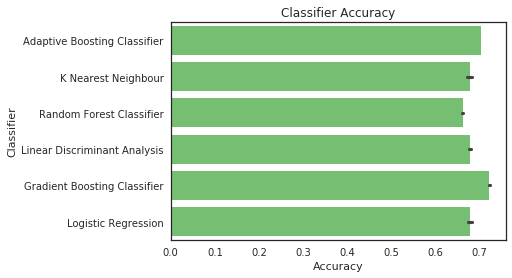

In [131]:
import warnings
warnings.filterwarnings('ignore')
rs = StratifiedShuffleSplit(n_splits=2, test_size=0.2,random_state=0)
rs.get_n_splits(data_X,data_y)
for Name,classify in classifiers.items():
    for train_index, test_index in rs.split(data_X,data_y):
        X,X_test = data_X.iloc[train_index], data_X.iloc[test_index]
        y,y_test = data_y.iloc[train_index], data_y.iloc[test_index]
        cls = classify
        cls =cls.fit(X,y)
        y_out = cls.predict(X_test)
        accuracy = m.accuracy_score(y_test,y_out)
        precision = m.precision_score(y_test,y_out,average='macro')
        recall = m.recall_score(y_test,y_out,average='macro')
        roc_auc = roc_auc_score(y_out,y_test)
        f1_score = m.f1_score(y_test,y_out,average='macro')
        fpr, tpr, _ = roc_curve(y_test, y_out)
        matrix = metrics.confusion_matrix(y_test,y_out)
        log_entry = pd.DataFrame([[Name,accuracy,precision,recall,f1_score,roc_auc,matrix,fpr,tpr]], columns=log_cols)
        log = log.append(log_entry)
        
print(log)
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="g")  
plt.show()

In [132]:
fpr = pd.DataFrame(log['fpr'])
tpr = pd.DataFrame(log['tpr'])
fpr = fpr.reset_index(drop=True)
tpr = tpr.reset_index(drop=True)

# Midterm Cont.

In [148]:
pd.DataFrame(y_test).head()

,deposit
4794,1
10767,0
370,1
8889,0
10835,0


In [149]:
data['deposit'].head()

0    1
1    1
2    1
3    1
4    1
Name: deposit, dtype: int64

In [143]:
len(y_out)

2233

In [144]:
len(data['deposit'])

11162

In [150]:
len(y_test)

2233

In [192]:
class_rows = pd.DataFrame(y_test)
class_rows.head()

,deposit,predicted,correct
4794,1,1,0
10767,0,1,1
370,1,0,1
8889,0,0,0
10835,0,0,0


In [335]:
class_rows['predicted'] = y_out
class_rows['correct'] = np.where(class_rows['deposit'] == class_rows['predicted'],1,0)
class_rows_correct = class_rows[class_rows['correct']==1]
class_rows_incorrect = class_rows[class_rows['correct']==0]

In [344]:
data_correct = pd.DataFrame()
data_incorrect = pd.DataFrame()
class_rows_correct.head()

,deposit,predicted,correct
4794,1,1,1
8889,0,0,1
10835,0,0,1
746,1,1,1
2939,1,1,1


In [304]:
len(class_rows_correct)

1526

In [303]:
data.index.intersection(class_rows_correct.index)

Int64Index([  267,   309,   400,   422,   430,   456,   536,   625,   657,
              669,
            ...
            11060, 11076, 11079, 11081, 11097, 11100, 11105, 11106, 11136,
            11159],
           dtype='int64', length=1526)

In [339]:
data_correct = data[data.index.isin(class_rows_correct.index)]
data_incorrect = data[data.index.isin(class_rows_incorrect.index)]

#data_correct.head()
data_incorrect.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,...,Not_Contacted,Contacted,t_min,t_e_min,e_min,pdays_not_contacted,months_passed,married,singles,divorced
10,38,6,single,secondary,0,100,1,0,3,5,...,1,0,0,0,1,1,-0.033333,0,0,0
23,43,4,married,primary,0,-192,1,0,3,5,...,1,0,0,0,1,1,-0.033333,1,0,0
27,43,4,single,secondary,0,3,1,0,3,5,...,1,0,0,0,1,1,-0.033333,0,0,0
29,28,4,single,secondary,0,759,1,0,3,5,...,1,0,0,0,1,1,-0.033333,0,0,0
31,60,2,married,primary,0,65,1,0,3,5,...,1,0,0,0,1,1,-0.033333,1,0,0


In [308]:
data_correct.info

<bound method DataFrame.info of        age  job   marital  education  default  balance  housing  loan  \
267     43    1    single   tertiary        0     1046        0     0   
309     38   10    single   tertiary        0     3316        0     0   
400     26    9    single  secondary        0      111        0     0   
422     30    4    single  secondary        0     1598        1     0   
430     26    1    single   tertiary        0       45        0     0   
456     60    5   married  secondary        0      597        0     0   
536     41    2    single   tertiary        0      145        0     0   
625     52    9   married    primary        0      959        0     0   
657     51   11  divorced   tertiary        0     1613        0     0   
669     58    1  divorced   tertiary        0     1257        0     0   
687     34    7   married  secondary        0     2956        0     0   
707     32    1    single   tertiary        0     4291        0     0   
712     31    1   m

In [309]:
data_correct.describe()

,age,job,default,balance,housing,loan,contact,month,duration,campaign,...,Not_Contacted,Contacted,t_min,t_e_min,e_min,pdays_not_contacted,months_passed,married,singles,divorced
count,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,...,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.0,1526.000000
mean,41.196592,4.293578,0.014417,1574.158585,0.471822,0.127785,2.180865,6.262779,307.916121,1.752949,...,0.730668,0.076016,0.000655,0.006553,0.992792,0.730668,0.651267,0.566186,0.0,0.110092
std,12.089855,2.842820,0.119240,3155.625326,0.499369,0.333960,0.519824,2.498475,275.373903,0.741227,...,0.443758,0.265110,0.025599,0.080712,0.084623,0.443758,1.163090,0.495763,0.0,0.313107
min,20.000000,1.000000,0.000000,-2282.000000,0.000000,0.000000,1.000000,1.000000,5.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.033333,0.000000,0.0,0.000000
25%,32.000000,2.000000,0.000000,107.250000,0.000000,0.000000,2.000000,5.000000,132.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-0.033333,0.000000,0.0,0.000000
50%,38.000000,4.000000,0.000000,536.000000,0.000000,0.000000,2.000000,6.000000,228.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-0.033333,1.000000,0.0,0.000000
75%,49.000000,6.000000,0.000000,1790.250000,1.000000,0.000000,2.000000,8.000000,388.500000,2.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.0,0.000000
max,93.000000,12.000000,1.000000,52587.000000,1.000000,1.000000,3.000000,12.000000,1960.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.0,1.000000


In [312]:
data.describe()

,age,job,default,balance,housing,loan,contact,month,duration,campaign,...,Not_Contacted,Contacted,t_min,t_e_min,e_min,pdays_not_contacted,months_passed,married,singles,divorced
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,...,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.0,11162.000000
mean,41.231948,4.231679,0.015051,1528.538524,0.473123,0.130801,2.140835,6.190826,371.993818,1.750672,...,0.745744,0.066834,0.000717,0.005734,0.993550,0.745744,0.613916,0.568984,0.0,0.115839
std,11.913369,2.852383,0.121761,3225.413326,0.499299,0.337198,0.509616,2.572792,347.128386,0.740445,...,0.435461,0.249745,0.026763,0.075507,0.080059,0.435461,1.145079,0.495241,0.0,0.320047
min,18.000000,1.000000,0.000000,-6847.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.033333,0.000000,0.0,0.000000
25%,32.000000,2.000000,0.000000,122.000000,0.000000,0.000000,2.000000,5.000000,138.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-0.033333,0.000000,0.0,0.000000
50%,39.000000,4.000000,0.000000,550.000000,0.000000,0.000000,2.000000,6.000000,255.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-0.033333,1.000000,0.0,0.000000
75%,49.000000,6.000000,0.000000,1708.000000,1.000000,0.000000,2.000000,8.000000,496.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000
max,95.000000,12.000000,1.000000,81204.000000,1.000000,1.000000,3.000000,12.000000,3881.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.0,1.000000


In [333]:
data.corr()['deposit'].sort_values()

pdays_not_contacted   -0.230850
Not_Contacted         -0.230850
contact               -0.212974
housing               -0.203888
campaign              -0.129236
Middle_Aged           -0.119228
loan                  -0.110580
married               -0.092157
t_e_min               -0.069689
primary               -0.063002
No_Balance            -0.052797
secondary             -0.051952
default               -0.040680
t_min                 -0.025415
divorced               0.005228
unknown                0.014355
job                    0.022687
month                  0.028645
age                    0.034901
Adult                  0.043320
e_min                  0.074223
balance                0.081129
Neg_Balance            0.086544
tertiary               0.094598
previous               0.139867
pdays                  0.151593
Pos_Balance            0.153433
old                    0.167604
Contacted              0.185734
months_passed          0.212515
duration               0.451919
deposit 

In [332]:
data_correct.corr()['deposit'].sort_values()

pdays_not_contacted   -0.537039
Not_Contacted         -0.537039
housing               -0.499301
contact               -0.442946
campaign              -0.277372
Middle_Aged           -0.254612
married               -0.242624
loan                  -0.239630
secondary             -0.142728
primary               -0.137011
No_Balance            -0.116574
default               -0.092215
t_e_min               -0.069400
t_min                 -0.021881
divorced               0.000428
month                  0.046096
unknown                0.048347
age                    0.055704
job                    0.058331
e_min                  0.072811
Adult                  0.115053
Neg_Balance            0.192746
balance                0.224366
tertiary               0.230789
old                    0.296422
Pos_Balance            0.329598
Contacted              0.335669
previous               0.351075
duration               0.351369
pdays                  0.395633
months_passed          0.508831
deposit 

In [327]:
data.corr()

,age,job,default,balance,housing,loan,contact,month,duration,campaign,...,Not_Contacted,Contacted,t_min,t_e_min,e_min,pdays_not_contacted,months_passed,married,singles,divorced
age,1.000000,0.000966,-0.011425,0.112300,-0.168700,-0.031418,-0.135411,0.069312,0.000189,-0.005043,...,-0.027093,0.026800,-0.009233,-0.012236,0.014627,-0.027093,0.025415,0.318436,NaN,0.186349
job,0.000966,1.000000,-0.008751,-0.034880,-0.059231,-0.019027,-0.017271,-0.043495,0.006503,-0.046929,...,-0.006600,-0.000356,-0.012739,0.012136,-0.007188,-0.006600,0.013117,-0.048990,NaN,0.002497
default,-0.011425,-0.008751,1.000000,-0.060954,0.011076,0.076434,0.045252,0.006561,-0.009760,0.016782,...,0.053592,-0.033082,-0.003311,0.000358,0.000769,0.053592,-0.048435,-0.006819,NaN,0.019633
balance,0.112300,-0.034880,-0.060954,1.000000,-0.077092,-0.084589,-0.067053,0.063818,0.022436,-0.021129,...,-0.046107,0.045018,0.009948,-0.011906,0.007903,-0.046107,0.037977,0.025431,NaN,-0.017586
housing,-0.168700,-0.059231,0.011076,-0.077092,1.000000,0.076761,0.247982,-0.117996,0.035051,-0.006858,...,0.024199,-0.117083,0.001442,-0.003042,0.002387,0.024199,-0.000364,0.036305,NaN,0.007430
loan,-0.031418,-0.019027,0.076434,-0.084589,0.076761,1.000000,0.020533,0.005308,-0.001914,0.019744,...,0.059318,-0.065514,-0.000461,0.005732,-0.005252,0.059318,-0.050088,0.044148,NaN,0.026463
contact,-0.135411,-0.017271,0.045252,-0.067053,0.247982,0.020533,1.000000,-0.129358,-0.002520,-0.007849,...,0.238486,-0.109160,0.005737,0.018596,-0.019457,0.238486,-0.230284,-0.006902,NaN,0.024666
month,0.069312,-0.043495,0.006561,0.063818,-0.117996,0.005308,-0.129358,1.000000,0.005390,0.037582,...,-0.007632,0.033974,0.017532,0.002208,-0.007943,-0.007632,-0.014671,0.052814,NaN,0.011889
duration,0.000189,0.006503,-0.009760,0.022436,0.035051,-0.001914,-0.002520,0.005390,1.000000,0.008767,...,0.043735,-0.036806,-0.028383,-0.079585,0.084548,0.043735,-0.038000,-0.036179,NaN,0.021364
campaign,-0.005043,-0.046929,0.016782,-0.021129,-0.006858,0.019744,-0.007849,0.037582,0.008767,1.000000,...,0.133772,-0.092543,-0.018110,0.070444,-0.060385,0.133772,-0.122512,0.053139,NaN,-0.002881


In [341]:
data_incorrect.describe()

,age,job,default,balance,housing,loan,contact,month,duration,campaign,...,Not_Contacted,Contacted,t_min,t_e_min,e_min,pdays_not_contacted,months_passed,married,singles,divorced
count,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,...,707.000000,707.000000,707.0,707.0,707.0,707.000000,707.000000,707.000000,707.0,707.000000
mean,39.869873,4.309760,0.016973,1656.185290,0.520509,0.130127,2.083451,6.097595,491.517680,1.724187,...,0.755304,0.036775,0.0,0.0,1.0,0.755304,0.604243,0.526167,0.0,0.131542
std,10.438273,2.767466,0.129262,3571.818582,0.499933,0.336682,0.451746,2.727020,410.400841,0.732894,...,0.430211,0.188342,0.0,0.0,0.0,0.430211,1.152323,0.499668,0.0,0.338231
min,18.000000,1.000000,0.000000,-3058.000000,0.000000,0.000000,1.000000,1.000000,13.000000,1.000000,...,0.000000,0.000000,0.0,0.0,1.0,0.000000,-0.033333,0.000000,0.0,0.000000
25%,32.000000,2.000000,0.000000,159.500000,0.000000,0.000000,2.000000,5.000000,171.500000,1.000000,...,1.000000,0.000000,0.0,0.0,1.0,1.000000,-0.033333,0.000000,0.0,0.000000
50%,38.000000,4.000000,0.000000,568.000000,1.000000,0.000000,2.000000,6.000000,366.000000,2.000000,...,1.000000,0.000000,0.0,0.0,1.0,1.000000,-0.033333,1.000000,0.0,0.000000
75%,47.000000,6.000000,0.000000,1597.000000,1.000000,0.000000,2.000000,8.000000,744.500000,2.000000,...,1.000000,0.000000,0.0,0.0,1.0,1.000000,-0.033333,1.000000,0.0,0.000000
max,87.000000,12.000000,1.000000,45248.000000,1.000000,1.000000,3.000000,12.000000,3183.000000,3.000000,...,1.000000,1.000000,0.0,0.0,1.0,1.000000,3.000000,1.000000,0.0,1.000000


In [342]:
data_incorrect.corr()['deposit'].sort_values()

months_passed         -0.392942
pdays                 -0.339624
previous              -0.246262
Contacted             -0.232263
Adult                 -0.218214
Pos_Balance           -0.202112
tertiary              -0.175051
old                   -0.149437
Neg_Balance           -0.145315
balance               -0.131409
job                   -0.069811
month                 -0.030981
No_Balance             0.017426
unknown                0.024791
secondary              0.025067
divorced               0.030087
default                0.066087
age                    0.104289
loan                   0.137631
primary                0.198074
married                0.213721
campaign               0.228116
Middle_Aged            0.254481
contact                0.333607
housing                0.370752
Not_Contacted          0.402753
pdays_not_contacted    0.402753
duration               0.561842
deposit                1.000000
t_min                       NaN
t_e_min                     NaN
e_min   

In [343]:
data_correct.corr()['deposit'].sort_values()

pdays_not_contacted   -0.537039
Not_Contacted         -0.537039
housing               -0.499301
contact               -0.442946
campaign              -0.277372
Middle_Aged           -0.254612
married               -0.242624
loan                  -0.239630
secondary             -0.142728
primary               -0.137011
No_Balance            -0.116574
default               -0.092215
t_e_min               -0.069400
t_min                 -0.021881
divorced               0.000428
month                  0.046096
unknown                0.048347
age                    0.055704
job                    0.058331
e_min                  0.072811
Adult                  0.115053
Neg_Balance            0.192746
balance                0.224366
tertiary               0.230789
old                    0.296422
Pos_Balance            0.329598
Contacted              0.335669
previous               0.351075
duration               0.351369
pdays                  0.395633
months_passed          0.508831
deposit 

In [346]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.5, random_state=0)

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

In [348]:
from sklearn.model_selection import GridSearchCV

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()


# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1000, 'kernel': 'rbf', 'gamma': 0.001}

Grid scores on development set:

0.650 (+/-0.025) for {'C': 1, 'kernel': 'rbf', 'gamma': 0.001}
0.653 (+/-0.042) for {'C': 1, 'kernel': 'rbf', 'gamma': 0.0001}
0.681 (+/-0.019) for {'C': 10, 'kernel': 'rbf', 'gamma': 0.001}
0.650 (+/-0.024) for {'C': 10, 'kernel': 'rbf', 'gamma': 0.0001}
0.691 (+/-0.025) for {'C': 100, 'kernel': 'rbf', 'gamma': 0.001}
0.680 (+/-0.025) for {'C': 100, 'kernel': 'rbf', 'gamma': 0.0001}
0.695 (+/-0.020) for {'C': 1000, 'kernel': 'rbf', 'gamma': 0.001}
0.685 (+/-0.020) for {'C': 1000, 'kernel': 'rbf', 'gamma': 0.0001}
0.683 (+/-0.024) for {'C': 1, 'kernel': 'linear'}
0.683 (+/-0.025) for {'C': 10, 'kernel': 'linear'}
0.682 (+/-0.022) for {'C': 100, 'kernel': 'linear'}
0.676 (+/-0.037) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed

In [356]:
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.kernel_approximation import Nystroem
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import make_pipeline


def get_models():
    nb = GaussianNB()
    svc = SVC(C=100, probability=True)
    knn = KNeighborsClassifier(n_neighbors=3)
    lr = LogisticRegression(C=100, random_state=0)
    nn = MLPClassifier((80, 10), early_stopping=False, random_state=0)
    gb = GradientBoostingClassifier(n_estimators=100, random_state=0)
    rf = RandomForestClassifier(n_estimators=10, max_features=3, random_state=0)

    models = {'svm': svc,
              'knn': knn,
              'naive bayes': nb,
              'mlp-nn': nn,
              'random forest': rf,
              'gbm': gb,
              'logistic': lr,
              }

    return models


def train_predict(model_list):
    """Fit models in list on training set and return preds"""
    P = np.zeros((y_test.shape[0], len(model_list)))
    P = pd.DataFrame(P)

    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(models.items()):
        print("%s..." % name, end=" ", flush=False)
        m.fit(X_train, y_train)
        P.iloc[:, i] = m.predict_proba(X_test)[:, 1]
        cols.append(name)
        print("done")

    P.columns = cols
    print("Done.\n")
    return P


def score_models(P, y):
    """Score model in prediction DF"""
    print("Scoring models.")
    for m in P.columns:
        score = roc_auc_score(y, P.loc[:, m])
        print("%-26s: %.3f" % (m, score))
    print("Done.\n")

In [358]:
models = get_models()
P = train_predict(models)
score_models(P, y_test)

Fitting models.
gbm... done
naive bayes... done
random forest... done
mlp-nn... done
knn... done
logistic... done
svm... done
Done.

Scoring models.
gbm                       : 0.764
naive bayes               : 0.706
random forest             : 0.687
mlp-nn                    : 0.735
knn                       : 0.657
logistic                  : 0.722
svm                       : 0.704
Done.



In [360]:
print("Ensemble ROC-AUC score: %.3f" % roc_auc_score(y_test, P.mean(axis=1)))


Ensemble ROC-AUC score: 0.739


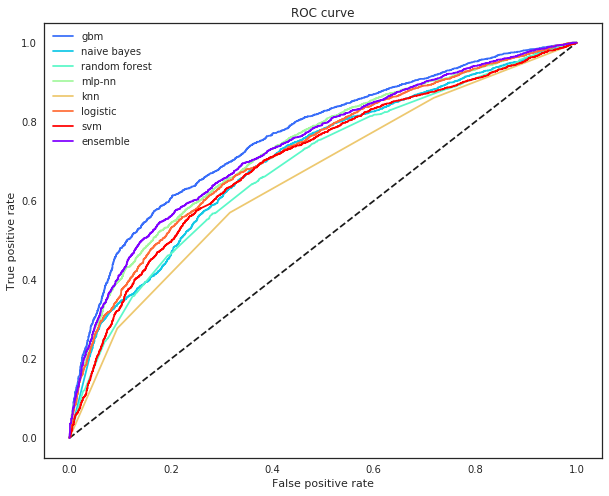

In [361]:
from sklearn.metrics import roc_curve

def plot_roc_curve(y_test, P_base_learners, P_ensemble, labels, ens_label):
    plt.figure(figsize=(10, 8))
    plt.plot([0, 1], [0, 1], 'k--')
    
    cm = [plt.cm.rainbow(i)
      for i in np.linspace(0, 1.0, P_base_learners.shape[1] + 1)]
    
    for i in range(P_base_learners.shape[1]):
        p = P_base_learners[:, i]
        fpr, tpr, _ = roc_curve(y_test, p)
        plt.plot(fpr, tpr, label=labels[i], c=cm[i + 1])

    fpr, tpr, _ = roc_curve(y_test, P_ensemble)
    plt.plot(fpr, tpr, label=ens_label, c=cm[0])
        
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(frameon=False)
    plt.show()


plot_roc_curve(y_test, P.values, P.mean(axis=1), list(P.columns), "ensemble")